# TRIX

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:trix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900


In [3]:
n = 15 # Number of days
df['SS_EMA'] = df['Adj Close'].rolling(n).mean()
df['DS_EMA'] = df['SS_EMA'].rolling(n).mean()
df['TS_EMA'] = df['DS_EMA'].rolling(n).mean()
df['TRIX'] = 100*(df['TS_EMA'] - df['TS_EMA'].shift())/df['TS_EMA'].shift()
df = df.drop(['SS_EMA','DS_EMA','TS_EMA'],axis=1)

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,TRIX
Date,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200,-0.844535
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500,-0.824819
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100,-0.806372
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400,-0.789566
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500,-0.772578


Text(0.5,0,'Date')

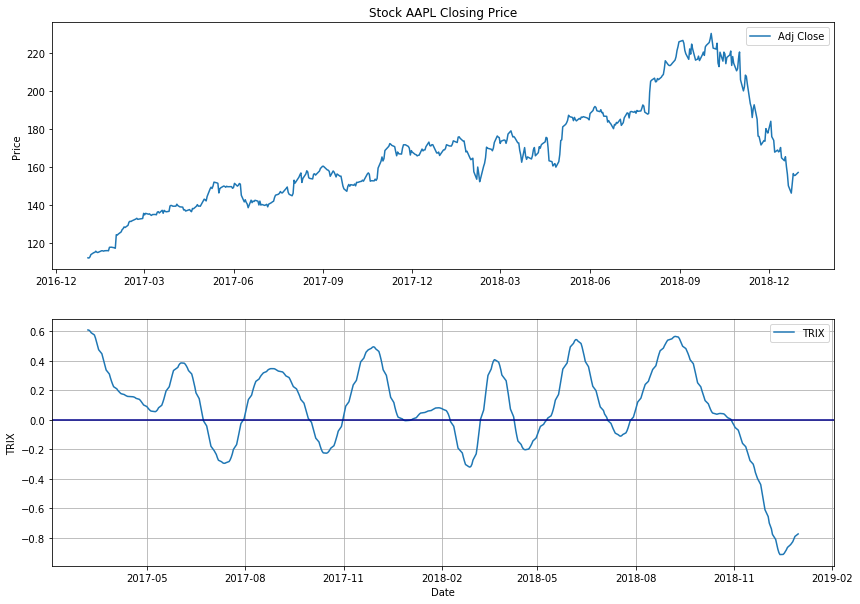

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['TRIX'], label='TRIX')
ax2.axhline(y=0, color='darkblue')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('TRIX')
ax2.set_xlabel('Date')

## Candlestick with TRIX

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TRIX,VolumePositive
0,736332.0,115.800003,116.330002,114.760002,116.150002,112.140007,28781900,NaN,False
1,736333.0,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,NaN,False
2,736334.0,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,NaN,False
3,736335.0,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,NaN,False
4,736338.0,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,NaN,False


Text(0.5,0,'Date')

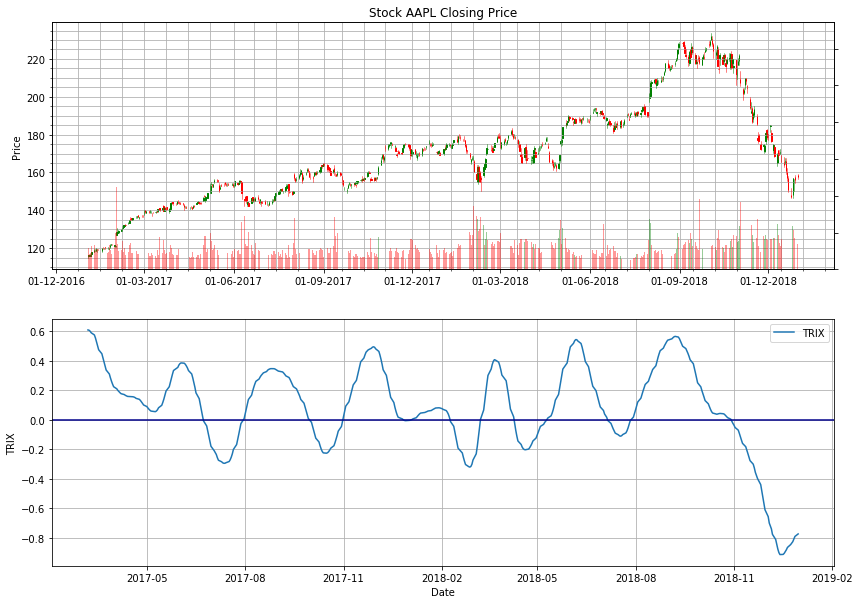

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['TRIX'], label='TRIX')
ax2.axhline(y=0, color='darkblue')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('TRIX')
ax2.set_xlabel('Date')